### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('castelli_perovskites_merged_v2.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 3978


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,fermi_level,fermi_width,e_form,gap_is_direct,mu_b,vbm,cbm,gap_gllbsc
0,-3,6,9,5.070926,1,0.198203,0.040242,-21000.000000,0.760000,0.940000,...,0,0,0.312138,0.001837,2.16,True,1.974478e-02,6.187694,6.187694,0.0
1,0,0,0,0.000000,1,0.681744,0.131124,0.000000,0.000000,0.000000,...,0,1,0.297083,0.001837,1.52,True,-2.253054e-05,6.033125,6.033125,0.0
2,-2,7,9,4.149967,1,0.660947,0.117035,-262000.000000,1.360000,1.360000,...,1,0,0.191139,0.003675,1.48,True,4.982109e+00,6.602253,6.602253,0.0
3,-2,3,5,2.886751,1,0.447278,0.076431,-321333.333333,0.793333,1.253333,...,1,0,0.316346,0.001837,1.24,True,-8.684496e-01,5.738462,5.738462,0.0
4,-2,4,6,2.687419,1,0.833972,0.154752,-297333.333333,1.600000,2.320000,...,1,0,0.312658,0.003675,0.62,True,2.164069e-15,6.074736,6.074736,0.0


In [3]:
target = 'fermi_level'

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

fermi_level
Max value: 0.524916800202
Min value: -0.0961530970053


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\1. castelli_perovskites (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
# Save unscaled data
joblib.dump(df_train, 'df_train_fermi.pkl')
joblib.dump(df_test, 'df_test_fermi.pkl')

['df_test_fermi.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
df_train

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,fermi_level,fermi_width,e_form,gap_is_direct,mu_b,vbm,cbm,gap_gllbsc
7691,1.00,0.000,0.000000,0.000000,0.0,0.875393,0.751267,1.000000,0.107675,0.000000,...,0.0,0.0,0.128741,0.001837,0.34,True,0.995722,5.364556,5.364556,0.0
1683,0.25,0.250,0.454545,0.409135,0.0,0.854436,0.489683,0.602849,0.176403,0.804795,...,0.0,1.0,0.263435,0.001837,1.94,True,3.885389,5.244551,5.244551,0.0
10880,0.25,0.625,0.727273,0.551677,0.0,0.498958,0.346955,0.448619,0.432990,0.413242,...,1.0,0.0,0.182816,0.003675,1.40,True,1.020432,7.121348,7.121348,0.0
18703,0.25,0.375,0.545455,0.493435,0.0,0.787178,0.607238,0.448619,0.601375,0.635845,...,1.0,0.0,0.273203,0.003675,0.70,True,1.521632,6.303255,6.303255,0.0
16840,0.50,0.375,0.454545,0.571040,0.0,0.568614,0.514633,0.260748,0.540664,0.630137,...,0.0,1.0,0.237940,0.001837,0.70,True,0.208908,6.185063,6.185063,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.50,0.375,0.454545,0.503610,0.0,0.478533,0.456956,0.157637,0.534937,0.470320,...,1.0,0.0,0.147443,0.001837,0.98,True,-1.211210,5.450533,5.450533,0.0
11964,1.00,0.000,0.000000,0.000000,0.0,0.825528,0.677369,1.000000,0.107675,0.000000,...,1.0,0.0,0.215233,0.001837,1.14,True,-2.686470,5.332054,5.332054,0.0
5390,0.25,0.375,0.545455,0.493435,0.0,0.478533,0.300202,0.729116,0.576174,0.477169,...,0.0,1.0,0.163415,0.001837,1.44,True,1.061389,5.239322,5.239322,0.0
860,0.50,0.375,0.454545,0.503610,0.0,0.737616,0.666838,0.157637,0.658648,0.662100,...,1.0,0.0,0.186018,0.001837,0.82,True,4.672661,5.300817,5.300817,0.0


In [8]:
# Create pandas.Dataframe of scaled test set using scaler as defined using training set

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

df_test

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,fermi_level,fermi_width,e_form,gap_is_direct,mu_b,vbm,cbm,gap_gllbsc
1705,0.50,0.375,0.454545,0.503610,0.0,0.783527,0.561995,0.157637,0.318442,0.703196,...,1.0,0.0,0.159747,0.001837,0.94,True,-0.357933,5.724171,5.724171,0.0
6508,0.25,0.500,0.636364,0.595880,0.0,0.563747,0.507432,0.488815,0.570447,0.581050,...,1.0,0.0,0.243787,0.001837,0.78,True,-0.016820,5.636631,5.636631,0.0
11429,0.50,0.250,0.363636,0.344031,0.0,0.875393,0.692944,0.260748,0.403207,0.897260,...,1.0,0.0,-0.035878,0.001837,2.86,True,0.000000,5.331548,5.331548,0.0
14316,0.50,0.500,0.545455,0.520126,0.0,0.700693,0.588292,0.494932,0.570447,0.683790,...,1.0,0.0,0.144089,0.001837,0.76,True,0.994258,5.814667,5.814667,0.0
12412,0.50,0.375,0.454545,0.503610,0.0,0.452741,0.431499,0.494932,0.542955,0.505708,...,1.0,0.0,0.215129,0.001837,1.72,True,1.601390,5.905022,5.905022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,0.50,0.500,0.545455,0.520126,0.0,0.616233,0.590157,0.157637,0.641466,0.566210,...,1.0,0.0,0.260225,0.001837,0.56,True,1.686810,5.655159,5.655159,0.0
2894,0.50,0.375,0.454545,0.503610,0.0,0.563747,0.473357,0.157637,0.486827,0.528539,...,1.0,0.0,0.168970,0.001837,1.40,True,0.767341,5.596615,5.596615,0.0
2225,0.25,0.625,0.727273,0.551677,0.0,0.825528,0.479630,0.729116,0.682703,0.751142,...,0.0,1.0,0.284065,0.001837,1.96,True,0.000734,5.473219,5.473219,0.0
14550,0.50,0.250,0.363636,0.344031,0.0,0.764867,0.667794,0.460853,0.725086,0.615297,...,1.0,0.0,0.138085,0.003675,1.40,True,-0.712419,6.452344,6.452344,0.0


In [9]:
# Save 
os.chdir('C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)')

joblib.dump(df_train, 'df_train_fermi_scaled.pkl')
joblib.dump(df_test, 'df_test_fermi_scaled.pkl')

['df_test_fermi_scaled.pkl']

#### GBFS

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [2]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_file = path + 'df_train_fermi_scaled.pkl'
path_to_save = path + 'fermi_level_results/'

# Either a list or saved file
features = path + 'features.pkl'

In [3]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = 'fermi_level',
            features = features,
            oversampled_it = False, 
            problem = 'regression'
            )

Name of target column:  fermi_level
No. of exploratory features:  3978


In [4]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(boosting_method = 'lightGBM')

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 12113
   No. of rows in the training set: 12113
   Metric score:  -0.00038
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 12113
   No. of rows in the training set: 12113
   Metric score:  -0.00029
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 12113
   No. of rows in the training set: 12113
   Metric score:  -0.00030


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 12113
   

LGBMRegressor(importance_type='gain', n_estimators=500, num_leaves=50,
              objective='regression')

Result saved as: feature_relevance_score_fermi_level.pkl
Figure saved as: feature_relevance_plot_fermi_level.png


,feature,relevance_score
0,density,64.430787
1,jml_oq_enp,60.161133
2,jml_jv_enp,22.233998
3,jml_pack_frac,20.723320
4,xrd_17,19.563720
...,...,...
3973,OFM_f14__f8,0.000000
3974,OFM_f14__f9,0.000000
3975,OFM_f14__f10,0.000000
3976,OFM_f14__f11,0.000000


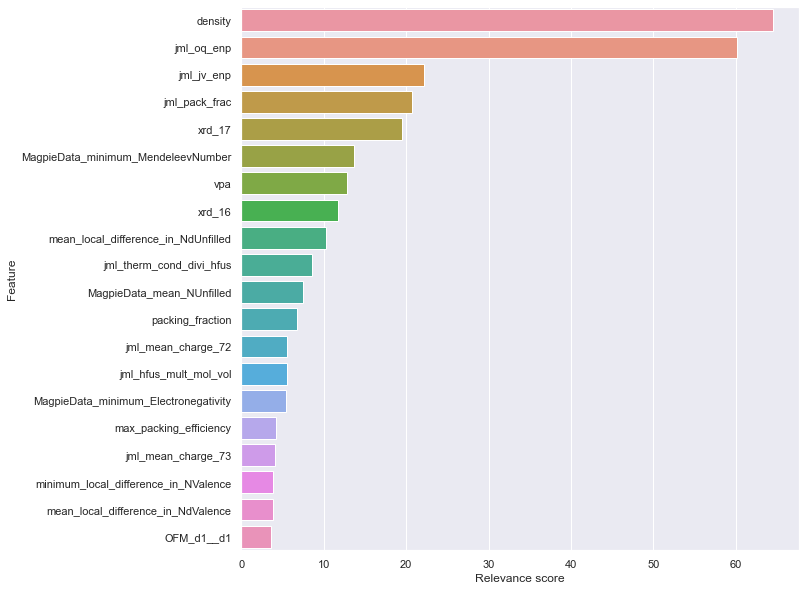

In [5]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [6]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 300,
                    max_no_imp = 10
                    )

   No. of rows in training set:  12113
No. of features considering:  1

n=1: mae_train=0.0504, mae_validation=0.0514 
n=1: mse_train=0.0041, mse_validation=0.0043 
n=1: rmse_train=0.0641, rmse_validation=0.0658 
n=1: r2_train=0.3852, r2_validation=0.3655 
n=1: max_error_train=0.2989, max_error_validation=0.3038 
--- 0.725658655166626 seconds --- 

No. of features considering:  2

n=2: mae_train=0.0348, mae_validation=0.0457 
n=2: mse_train=0.0020, mse_validation=0.0035 
n=2: rmse_train=0.0449, rmse_validation=0.0595 
n=2: r2_train=0.6983, r2_validation=0.4817 
n=2: max_error_train=0.2612, max_error_validation=0.2816 
--- 0.4854409694671631 seconds --- 

No. of features considering:  3

n=3: mae_train=0.0295, mae_validation=0.0443 
n=3: mse_train=0.0015, mse_validation=0.0034 
n=3: rmse_train=0.0385, rmse_validation=0.0581 
n=3: r2_train=0.7782, r2_validation=0.5056 
n=3: max_error_train=0.2087, max_error_validation=0.3433 
--- 0.506460428237915 seconds --- 

No. of no improvements:  0


,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.050439,0.051438,0.004114,0.004332,0.064139,0.065820,0.385211,0.365526,0.298912,0.303806
2,0.034780,0.045741,0.002019,0.003539,0.044929,0.059487,0.698326,0.481746,0.261250,0.281605
3,0.029489,0.044322,0.001484,0.003376,0.038521,0.058102,0.778241,0.505597,0.208682,0.343344
4,0.020741,0.038564,0.000765,0.002628,0.027666,0.051267,0.885615,0.615075,0.191556,0.270517
5,0.016968,0.033323,0.000507,0.001969,0.022507,0.044368,0.924294,0.711698,0.146500,0.242868
...,...,...,...,...,...,...,...,...,...,...
295,0.001649,0.012310,0.000005,0.000250,0.002153,0.015815,0.999307,0.963371,0.013965,0.075467
296,0.001656,0.012145,0.000005,0.000244,0.002163,0.015605,0.999301,0.964337,0.015379,0.073600
297,0.001673,0.012225,0.000005,0.000244,0.002186,0.015612,0.999286,0.964302,0.014009,0.082945


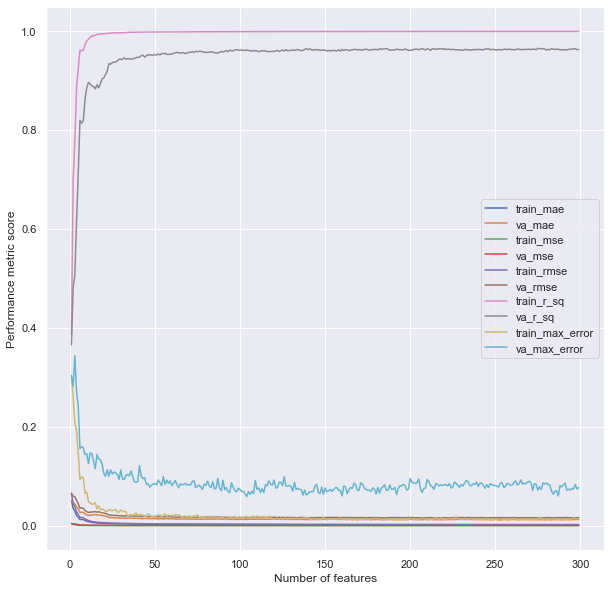

Result saved as: GBFS_convergence_plot_fermi_level.pkl


<Figure size 720x720 with 0 Axes>

In [7]:
# Plot the result
FS.convergence_plot()

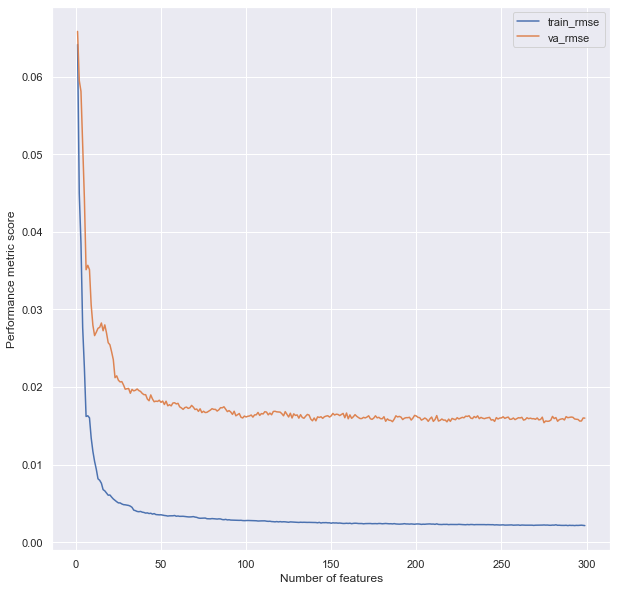

Result saved as: GBFS_convergence_plot_fermi_level.pkl


<Figure size 720x720 with 0 Axes>

In [8]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

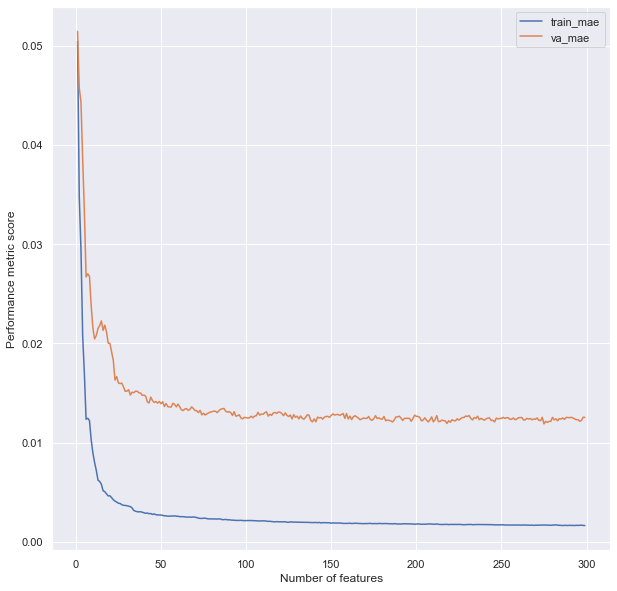

Result saved as: GBFS_convergence_plot_fermi_level.pkl


<Figure size 720x720 with 0 Axes>

In [9]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

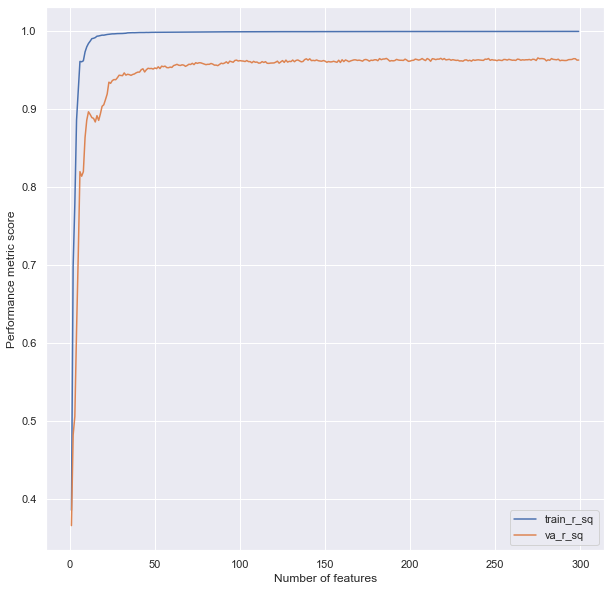

Result saved as: GBFS_convergence_plot_fermi_level.pkl


<Figure size 720x720 with 0 Axes>

In [10]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

In [11]:
# # Plot the result
# FS.convergence_plot(
#                     train_metric = ['train_r_sq', 'train_rmse', 'train_mae'],
#                     validation_metric = ['va_r_sq', 'va_rmse', 'va_mae']
#                     )

##### Statistical Analyses - Regression

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [2]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_file = path + 'df_train_fermi_scaled.pkl'
path_to_save = path + 'fermi_level_results/'

# Either a list or saved file
target = 'fermi_level'
features = path + 'features.pkl'

In [3]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  fermi_level
No. of exploratory features:  3978


In [4]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  915


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,LUMO_element_ohe_Tl,LUMO_element_ohe_V,LUMO_element_ohe_W,LUMO_element_ohe_Y,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,fermi_level
7691,1.00,0.000,0.000000,0.000000,0.875393,0.751267,1.000000,0.107675,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.128741
1683,0.25,0.250,0.454545,0.409135,0.854436,0.489683,0.602849,0.176403,0.804795,0.955556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.263435
10880,0.25,0.625,0.727273,0.551677,0.498958,0.346955,0.448619,0.432990,0.413242,0.115556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.182816
18703,0.25,0.375,0.545455,0.493435,0.787178,0.607238,0.448619,0.601375,0.635845,0.186667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.273203
16840,0.50,0.375,0.454545,0.571040,0.568614,0.514633,0.260748,0.540664,0.630137,0.257778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.237940


In [5]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  107
No. of numerical features:  2963 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_fermi_level_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,jml_oq_enp,8.525582e+03,1.000000e+00
1,jml_jv_enp,8.001073e+03,9.384782e-01
2,jml_density,7.427167e+03,8.711624e-01
3,vpa,7.427167e+03,8.711624e-01
4,density,7.090329e+03,8.316533e-01
...,...,...,...
2958,MagpieData_mode_Row,8.220908e-05,9.637825e-09
2959,OFM_p6__p1,2.623100e-05,3.071930e-09
2960,OFM_d8__d9,8.202807e-06,9.573308e-10
2961,jml_adf2_54,7.709939e-07,8.562339e-11


In [6]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  107
No. of numerical features:  2963 

Result saved as: MI_result_fermi_level.pkl


,feature_names,MI,MI_scaled
0,MagpieData_minimum_MendeleevNumber,0.296047,1.000000
1,PymatgenData_minimum_mendeleev_no,0.292632,0.988464
2,jml_first_ion_en_divi_hfus,0.279619,0.944507
3,PymatgenData_range_mendeleev_no,0.277964,0.938916
4,MagpieData_minimum_Electronegativity,0.258742,0.873987
...,...,...,...
3038,OFM_d9__d7,0.000000,0.000000
3039,OFM_d9__p2,0.000000,0.000000
3040,OFM_p2__d9,0.000000,0.000000
3041,OFM_p6__d9,0.000000,0.000000


#### Feature Engineering 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [2]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_file = path + 'castelli_perovskites_merged_v2.pkl'  # all data
path_to_save = path + 'fermi_level_results/'

# Either a list or saved file for the features
target = 'fermi_level'
features = path + 'features.pkl'

In [3]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,jml_oq_enp,8525.582128,1.000000
1,jml_jv_enp,8001.073296,0.938478
2,jml_density,7427.166540,0.871162
3,vpa,7427.166540,0.871162
4,density,7090.328578,0.831653


In [4]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,MagpieData_minimum_MendeleevNumber,0.296047,1.000000
1,PymatgenData_minimum_mendeleev_no,0.292632,0.988464
2,jml_first_ion_en_divi_hfus,0.279619,0.944507
3,PymatgenData_range_mendeleev_no,0.277964,0.938916
4,MagpieData_minimum_Electronegativity,0.258742,0.873987


In [5]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,density,64.430787
1,jml_oq_enp,60.161133
2,jml_jv_enp,22.233998
3,jml_pack_frac,20.723320
4,xrd_17,19.563720


In [6]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  fermi_level
No. of exploratory features:  3978


In [7]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['jml_oq_enp', 'jml_jv_enp', 'jml_density', 'vpa', 'density', 'MagpieData_minimum_MendeleevNumber', 'PymatgenData_minimum_mendeleev_no', 'jml_first_ion_en_divi_hfus', 'PymatgenData_range_mendeleev_no', 'MagpieData_minimum_Electronegativity', 'density', 'jml_oq_enp', 'jml_jv_enp', 'jml_pack_frac', 'xrd_17']


In [8]:
# Perform feature engineering
df, new_cols = perform.brute_force(
                    feature_list = feature_list
                    )

df.head()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,jml_pack_frac/PymatgenData_range_mendeleev_no,PymatgenData_range_mendeleev_no/xrd_17,xrd_17/PymatgenData_range_mendeleev_no,MagpieData_minimum_Electronegativity/jml_pack_frac,jml_pack_frac/MagpieData_minimum_Electronegativity,MagpieData_minimum_Electronegativity/xrd_17,xrd_17/MagpieData_minimum_Electronegativity,jml_pack_frac/xrd_17,xrd_17/jml_pack_frac,fermi_level
0,-3,6,9,5.070926,1,0.198203,0.040242,-21000.000000,0.760000,0.940000,...,0.071861,2.151207e+07,4.648553e-08,0.834940,1.197690,1.290724e+06,7.747588e-07,1.545888e+06,6.468773e-07,0.312138
1,0,0,0,0.000000,1,0.681744,0.131124,0.000000,0.000000,0.000000,...,0.054098,1.321026e+05,7.569874e-06,0.471182,2.122323,3.367321e+03,2.969720e-04,7.146543e+03,1.399278e-04,0.297083
2,-2,7,9,4.149967,1,0.660947,0.117035,-262000.000000,1.360000,1.360000,...,0.062756,7.923258e+04,1.262107e-05,0.688089,1.453300,3.421407e+03,2.922774e-04,4.972330e+03,2.011129e-04,0.191139
3,-2,3,5,2.886751,1,0.447278,0.076431,-321333.333333,0.793333,1.253333,...,0.058352,7.733365e+04,1.293098e-05,0.707854,1.412721,3.194216e+03,3.130659e-04,4.512536e+03,2.216049e-04,0.316346
4,-2,4,6,2.687419,1,0.833972,0.154752,-297333.333333,1.600000,2.320000,...,0.052947,2.133689e+18,4.686720e-19,0.472174,2.117862,5.334221e+16,1.874688e-17,1.129714e+17,8.851796e-18,0.312658


In [9]:
perform.save()

Result saved as: df_fermi_level_engineered_features.pkl
Result saved as: features_fermi_level_engineered.pkl
Result saved as: df_train_fermi_level_engineered.pkl
Result saved as: df_test_fermi_level_engineered.pkl


#### Multi-Collinearity Reduction

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [2]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'fermi_level_results/'
path_to_file = path_to_save + 'df_train_fermi_level_engineered.pkl'

# Features 
target = 'fermi_level'

n = 150 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_fermi_level.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_fermi_level_engineered.pkl')
features = gbfs_cols + new_cols

print(len(gbfs_cols))
print(len(new_cols))
len(features)

150
132


282

In [3]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  fermi_level
No. of exploratory features:  282


In [4]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.9)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  172
Features saved as: features_selected_from_correlation_analysis_fermi_level.pkl


c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Figure saved as: Dendrogram_fermi_level.png


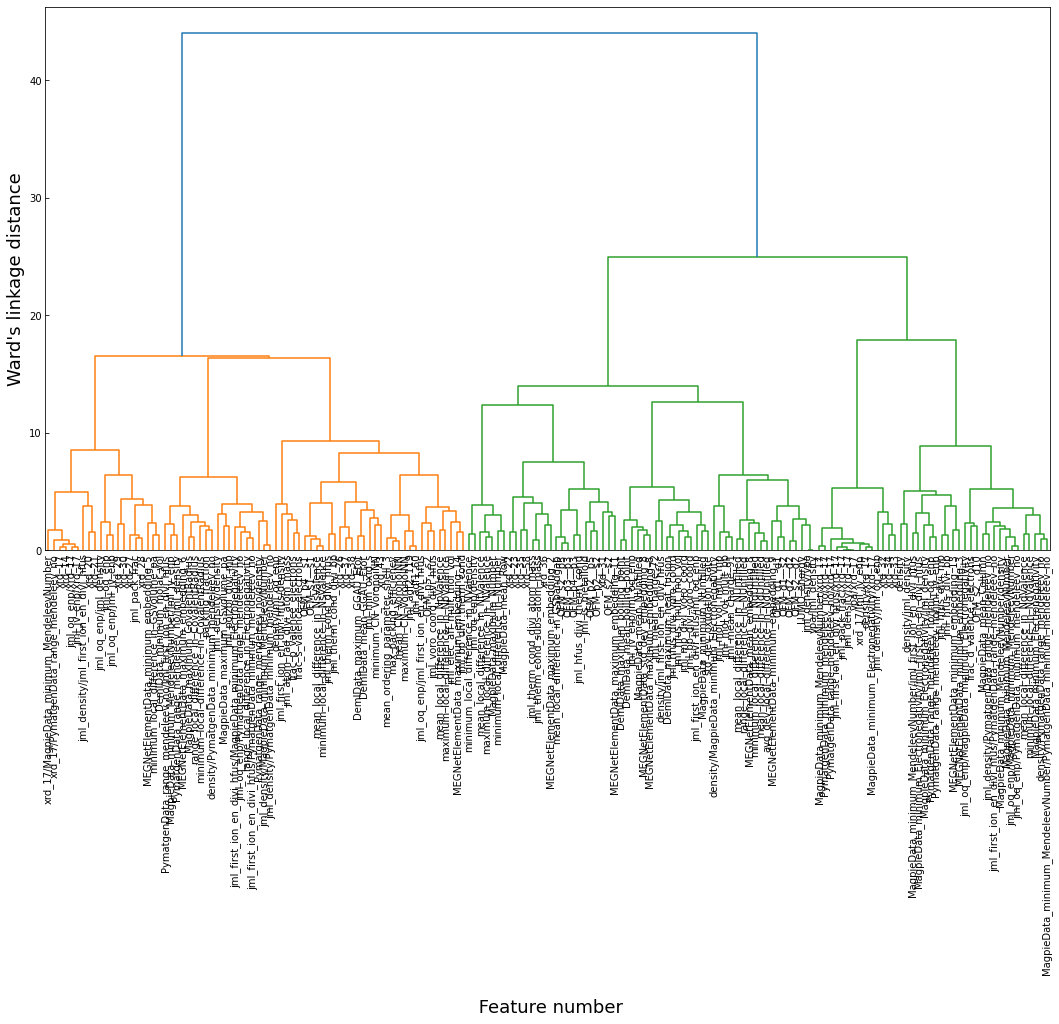

In [5]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [6]:
# Select features based on the given linkage threshold
threshold_list = [5, 6, 7, 8, 9, 10]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  25
Features saved as features_selected_from_hierarchical_analysis_fermi_level_threshold_5.pkl
Number of features remaining:  18
Features saved as features_selected_from_hierarchical_analysis_fermi_level_threshold_6.pkl
Number of features remaining:  14
Features saved as features_selected_from_hierarchical_analysis_fermi_level_threshold_7.pkl
Number of features remaining:  13
Features saved as features_selected_from_hierarchical_analysis_fermi_level_threshold_8.pkl
Number of features remaining:  10
Features saved as features_selected_from_hierarchical_analysis_fermi_level_threshold_9.pkl
Number of features remaining:  9
Features saved as features_selected_from_hierarchical_analysis_fermi_level_threshold_10.pkl


In [7]:
# threshold_list = np.linspace(3, 4, 6)

# for i in threshold_list:
#     final_features = data.apply_linkage_threshold(threshold = i)

#### Recursive Feature Elimination

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [2]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'fermi_level_results/'
path_to_file = path_to_save + 'df_train_fermi_level_engineered.pkl'

# Features 
target = 'fermi_level'
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_fermi_level_threshold_5.pkl')

scaled = False

problem = 'regression'

In [3]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: fermi_level
No. of features: 25


In [4]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


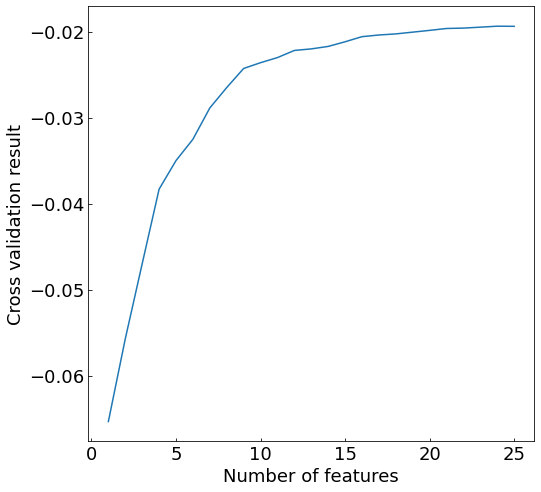

Figure saved as: RFE_plot_fermi_level.png


In [5]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model

In [1]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'fermi_level_results/'
path_to_file = path_to_save + 'df_train_fermi_level_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_fermi_level_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_fermi_level_engineered.pkl')

# Features 
target = 'fermi_level'
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_fermi_level_threshold_5.pkl')
len(features)

25

In [3]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [4]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [5]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [6]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 0.480944344594
Min value: -0.0957816585496


In [7]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 0.6
        min_value = -0.2

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.05)

        # line of best fit
        linear_fit = np.linspace(min_value+0.01, max_value-0.01, 20)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value+0.01, max_value-0.01, 20)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 6)

        onset = 0.05
        ax_scatter.set_xlabel('DFT Calculation of Fermi Level ($eV$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Fermi Level ($eV$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        # ax_scatter.set_yscale('log')
        # ax_scatter.set_xscale('log')

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 100, 200])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 90, 180])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        if adj is True:
                ax_hist_y.hist(
                                y_pred_adj, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )
        else:
                ax_hist_y.hist(
                                y_pred, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )

        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(0.3, 0.45, r'$y = x$', fontdict=font1)
        ax_scatter.text(0.4, 0.3, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],2)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        
        x_label_pos = 0.34
        y_label_pos = -0.22
        ax_scatter.text(x_label_pos, y_label_pos+0.075, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_label_pos, y_label_pos+0.04, r'$MAE$ = ' + str('{:.3f}'.format(round(mae, 3))) + ' $eV$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_label_pos, y_label_pos, r'$RMSE$ = ' + str(round(mse,3)) + ' $eV$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.102e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        02:39:28   Log-Likelihood:                 10584.
No. Observations:                3786   AIC:                        -2.116e+04
Df Residuals:                    3784   BIC:                        -2.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0106      0.001     16.

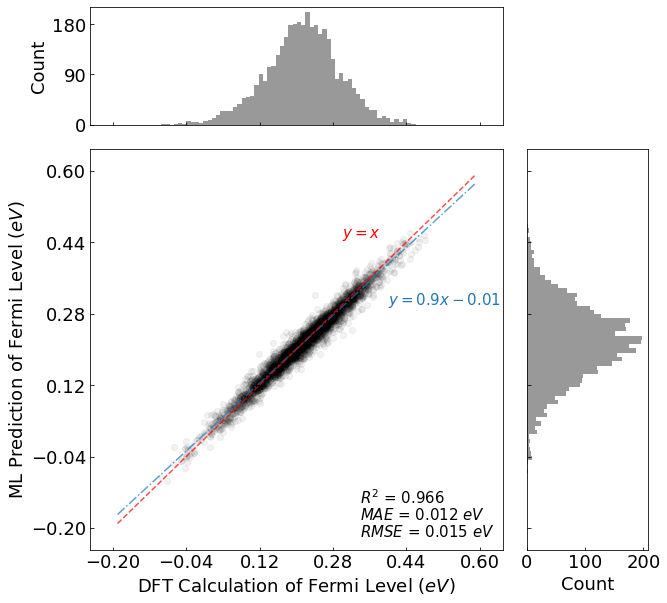

m =  0.9496460801294456
c =  0.010570093726872854 

MAE:  0.011751449957484136
MSE:  0.0002363976866673624
RMSE:  0.015375229646004069
R-squared:  0.9664976567351975
Max error:  0.08124471988038681
Explained_variance_score:  0.9665026895601143


In [8]:
plot(df_pred, adj=False)

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.624e+05
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        03:46:54   Log-Likelihood:                 11261.
No. Observations:                3786   AIC:                        -2.252e+04
Df Residuals:                    3784   BIC:                        -2.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0077      0.001     14.

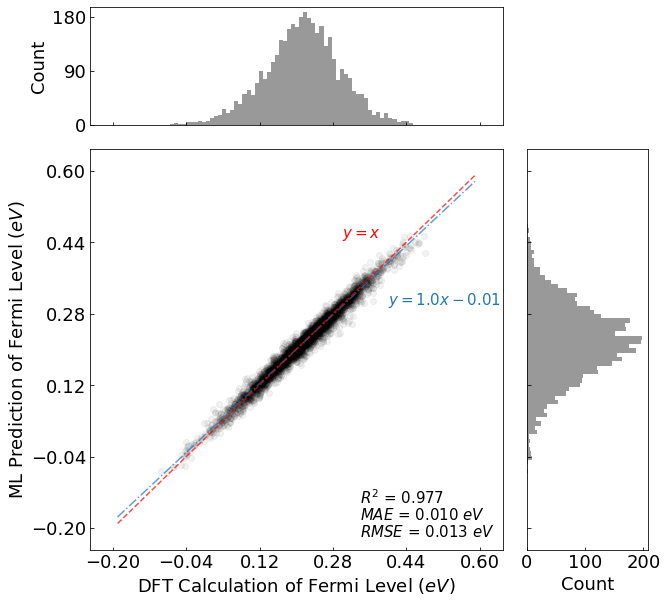

m =  0.9639585983855716
c =  0.007747347152836261 

MAE:  0.009691389719502614
MSE:  0.00016194507457296988
RMSE:  0.012725764203888499
R-squared:  0.9770491007975809
Max error:  0.06611233716569148
Explained_variance_score:  0.9770494111558262


In [ ]:
# All features
# plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

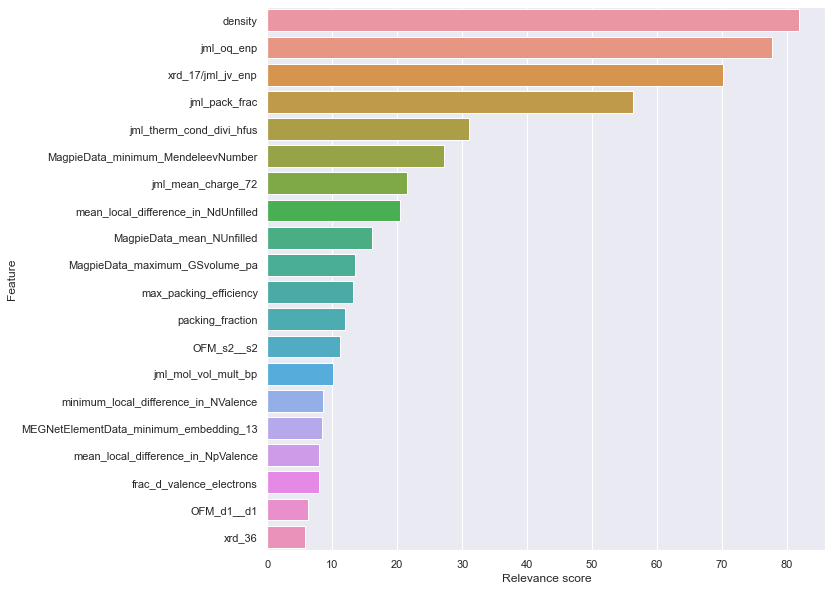

In [10]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [1]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [2]:
# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'fermi_level_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_fermi_level_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_fermi_level_engineered.pkl'

target = 'fermi_level'
path_to_features = path_to_save + 'features_selected_from_RFE_fermi_level.pkl' 

problem = 'regression'

scaled = False

In [3]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  fermi_level
No. of exploratory features:  24


In [4]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [5]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [6]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.27007666221362275, 'n_estimators': 320, 'num_leaves': 22} 

Score:  0.017427121754419815 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.3722
Function value obtained: 0.0174
Current minimum: 0.0174
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.4358669967990034, 'n_estimators': 741, 'num_leaves': 20} 

Score:  0.01894475892266677 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 2.2620
Function value obtained: 0.0189
Current minimum: 0.0174
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.7222809211485353, 'n_estimators': 627, 'num_leaves': 51} 

Score:  0.02584949715088903 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.8226
Function value obtained: 0.0258
Current minimum: 0.0174
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.01

Saved: Optimisation_result_fermi_level.png


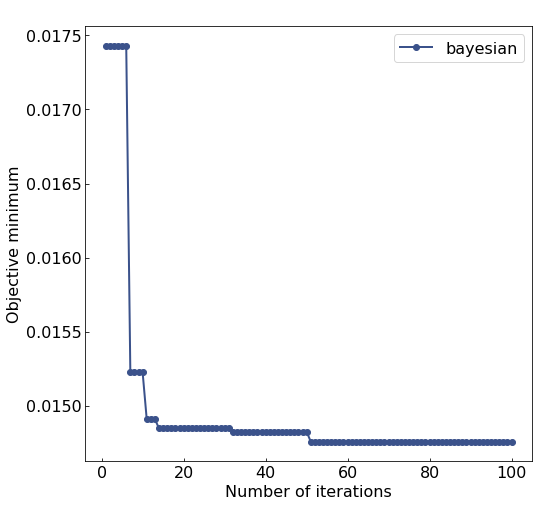

In [7]:
# Plot convergence plot
final_stage.convergence_plot()

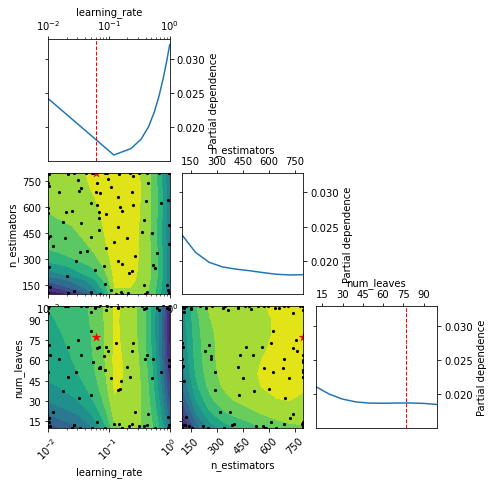

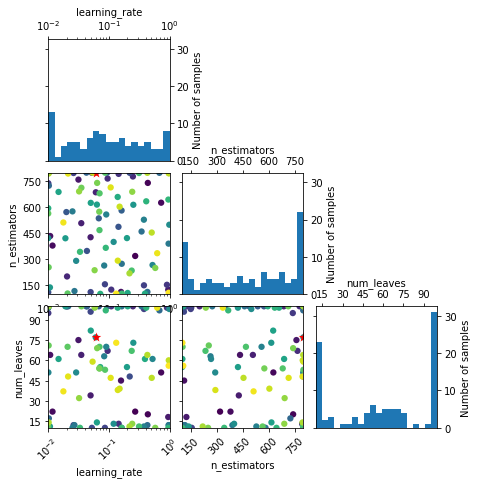

In [8]:
# objective and evaluation plot
final_stage.objective_plot()

In [9]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.060426565229690615,
              n_estimators=800, num_leaves=77, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.359e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        16:55:16   Log-Likelihood:                 10965.
No. Observations:                3786   AIC:                        -2.193e+04
Df Residuals:                    3784   BIC:                        -2.191e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0099      0.001     16.651      

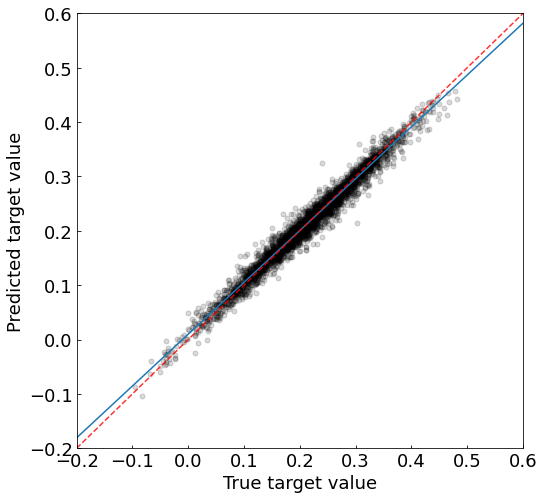

Saved: regression_plot_fermi_level.png


In [10]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'micro', 
                    adjusted = False, 
                    max_value = 0.6,
                    min_value = -0.2
                    )


### Final Figure

In [1]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/1. castelli_perovskites (done)/'
path_to_save = path + 'fermi_level_results/'

# Features
target = 'fermi_level'
features = joblib.load(path_to_save + 'features_selected_from_RFE_' + target + '.pkl')

# Path to training data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

In [3]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.060426565229690615,
                    n_estimators=800,
                    num_leaves=77,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.060426565229690615,
              n_estimators=800, num_leaves=77, objective='regression',
              random_state=42)

In [4]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [5]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 0.480944344594
Min value: -0.0957816585496


In [6]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 0.6
        min_value = -0.2

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.05)

        # line of best fit
        linear_fit = np.linspace(min_value+0.01, max_value-0.01, 20)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(min_value+0.01, max_value-0.01, 20)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(min_value, max_value, 6)

        onset = 0.05
        ax_scatter.set_xlabel('DFT Calculation of Fermi Level ($eV$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of Fermi Level ($eV$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(min_value-onset, max_value+onset)
        ax_scatter.set_ylim(min_value-onset, max_value+onset)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)
        # ax_scatter.set_yscale('log')
        # ax_scatter.set_xscale('log')

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(min_value-onset, max_value+onset)
        ax_hist_x.set_xticks([0, 100, 200])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(min_value-onset, max_value+onset)
        ax_hist_y.set_yticks([0, 90, 180])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        if adj is True:
                ax_hist_y.hist(
                                y_pred_adj, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )
        else:
                ax_hist_y.hist(
                                y_pred, 
                                bins=bins, 
                                color=color, 
                                histtype=histtype,
                                alpha=alpha
                                )

        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(0.3, 0.45, r'$y = x$', fontdict=font1)
        ax_scatter.text(0.4, 0.3, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],2)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        
        x_label_pos = 0.34
        y_label_pos = -0.22
        ax_scatter.text(x_label_pos, y_label_pos+0.075, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(x_label_pos, y_label_pos+0.04, r'$MAE$ = ' + str('{:.3f}'.format(round(mae, 3))) + ' $eV$', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(x_label_pos, y_label_pos, r'$RMSE$ = ' + str(round(mse,3)) + ' $eV$', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.389e+05
Date:                Mon, 16 May 2022   Prob (F-statistic):               0.00
Time:                        16:57:28   Log-Likelihood:                 11002.
No. Observations:                3786   AIC:                        -2.200e+04
Df Residuals:                    3784   BIC:                        -2.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0095      0.001     16.

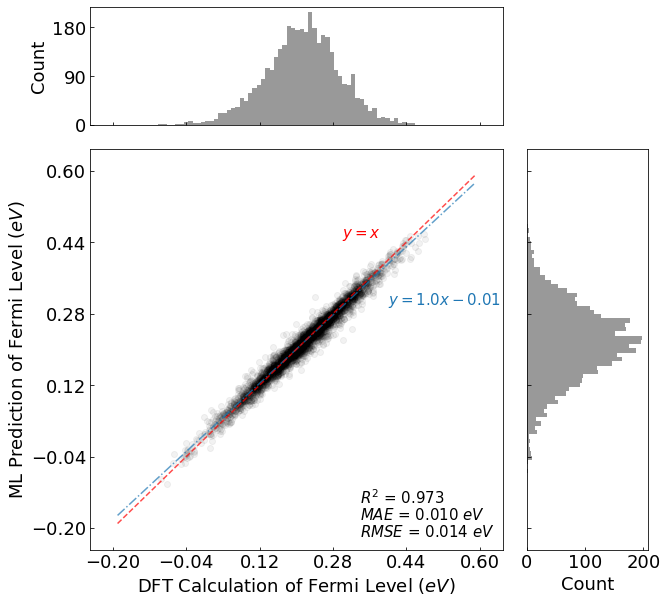

m =  0.9545410456214073
c =  0.00952543584073963 

MAE:  0.010308943912789654
MSE:  0.00018976756808083647
RMSE:  0.013775614980131974
R-squared:  0.9731060895899676
Max error:  0.08178261174363963
Explained_variance_score:  0.9731110588990306


In [7]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

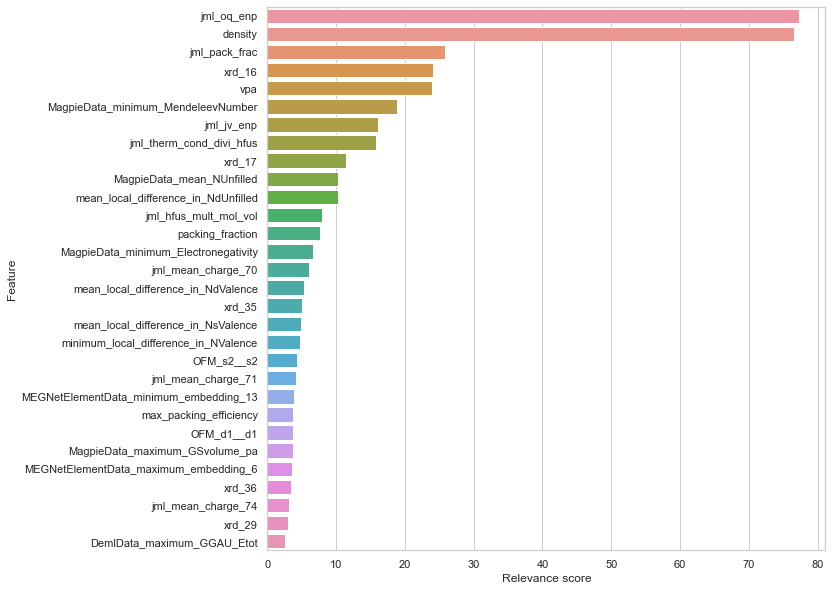

In [ ]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': df_test.iloc[:, :-8].columns.tolist(), 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)